In [22]:
import pandas as pd
import numpy as np
import os

In [23]:
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv("manoz.csv")
df

,Unnamed: 0,NACCID,HISPORX,RACE,BIRTHYR,SEX,HANDED,DIABETES,HYPERTEN,HYPERCHO,...,TOBAC30,TOBAC100,SMOKYRS,CVHATT,NACCMMSE,NACCAGEB,NACCBMI,Impairment,CANCER,NACCALZD
0,0,NACC000385,0,1,1926,1,2,0,1,1,...,0,1,15,1,24,80,8.799999,4,0,1
1,1,NACC000385,0,1,1926,1,2,0,1,1,...,0,1,20,1,22,80,29.000000,4,0,1
2,2,NACC000385,0,1,1926,1,2,0,1,1,...,0,1,17,1,21,80,29.000000,4,0,1
3,3,NACC000385,0,1,1926,1,2,0,1,1,...,0,1,17,1,20,80,26.399999,4,1,1
4,4,NACC000385,0,1,1926,1,2,0,1,1,...,0,1,20,1,16,80,29.000000,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121093,121093,NACC90475,0,2,1936,2,2,1,1,1,...,0,0,0,0,25,70,8.799999,3,0,0
121094,121094,NACC90475,0,2,1936,2,2,1,1,1,...,0,0,0,0,26,70,8.799999,4,1,0
121095,12100,NACC999391,0,1,1918,1,2,0,1,1,...,0,1,40,1,28,87,26.799999,3,0,0
121096,12100,NACC999391,0,1,1918,1,2,0,1,1,...,0,1,40,1,28,87,27.099999,4,0,1


In [25]:
X=df[['HISPORX','SEX','DIABETES','HYPERTEN','HYPERCHO','TOBAC30','ALCOHOL','NACCMMSE','NACCALZD','CDRGLOB','CVHATT','CANCER']]
y=df['Impairment']

In [26]:
import lightgbm as ltb

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [28]:
train_set = ltb.Dataset(X_train, y_train)
valid_set = ltb.Dataset(X_test, y_test)

In [29]:
params = { 
        "objective" : "multiclass", 
        "metric" : "multi_error",  
        "learning_rate" : 0.03,
        'num_class':5
}
evals_result = {}  # to record eval results for plotting

model = ltb.train(  params, 
                    train_set = train_set, 
                    num_boost_round=10000, 
                    early_stopping_rounds=200, 
                    verbose_eval=100, 
                    evals_result=evals_result,
                    valid_sets=[train_set,valid_set]
                  )
model.save_model('model.txt')

Training until validation scores don't improve for 200 rounds
[100]	training's multi_error: 0.109179	valid_1's multi_error: 0.110454
[200]	training's multi_error: 0.108816	valid_1's multi_error: 0.109562
[300]	training's multi_error: 0.108376	valid_1's multi_error: 0.109727
Early stopping, best iteration is:
[160]	training's multi_error: 0.108838	valid_1's multi_error: 0.109496


In [30]:
import matplotlib.pyplot as plt

In [31]:
features_label = X_train.columns
featureImp = list(model.feature_importance())
featureImp, features_label = zip(*sorted(zip(featureImp, features_label)))
with open("FeatureImportance.txt", "w") as text_file:
    for i in range(len(featureImp)):
        print(f"{features_label[i]} =  {featureImp[i]}", file=text_file)

Plotting metrics recorded during training...


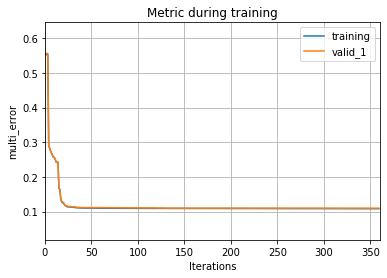

Plotting feature importances...


<Figure size 14400x14400 with 0 Axes>

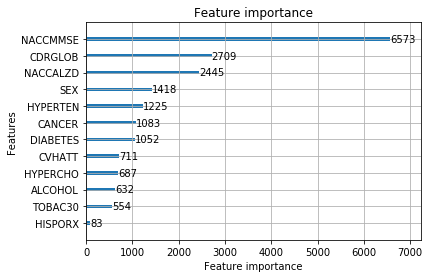

In [32]:
print('Plotting metrics recorded during training...')
ax = ltb.plot_metric(evals_result, metric='multi_error')
plt.show()
plt.figure(figsize=(200,200))
print('Plotting feature importances...')
ax = ltb.plot_importance(model, max_num_features=15)
plt.show()

In [33]:
from sklearn.metrics import accuracy_score
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
print(accuracy_score(y_test, pred))

0.890503715937242


In [36]:
# df['NACCUDSD'].unique()

In [35]:
df['HISPORX'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27])